In [2]:
# Import dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

In [3]:
# Read in the generation-levels-detail dataset
generation_levels_detail_df = pd.read_csv("./resources/dfa/dfa-generation-levels-detail.csv")
generation_levels_detail_df.head()  


,Date,Category,Assets,Nonfinancial assets,Real estate,Consumer durables,Financial assets,Deposits,Money market fund shares,Debt securities,...,Miscellaneous assets,Liabilities,Loans (Liabilities),Home mortgages,Consumer credit,Depository institutions loans n.e.c.,Other loans and advances (Liabilities),Deferred and unpaid life insurance premiums,Net worth,Household count
0,1989:Q3,Silent,17649120,5648793,4588120,1060674,12000326,2433812,309876,893002,...,139110,1267424,1257740,831951,308981,2354,114454,9684,16381696,48553376
1,1989:Q3,BabyBoom,5808847,3051118,2260930,790188,2757729,510502,52393,171564,...,85216,1831588,1825424,1355260,445761,2171,22233,6164,3977259,39289625
2,1989:Q3,GenX,131077,89437,44119,45318,41640,12634,374,4954,...,3023,53761,53633,23943,29466,7,217,128,77316,5177100
3,1989:Q3,Millennial,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1989:Q4,Silent,17908857,5722025,4654123,1067902,12186832,2443224,315117,901378,...,141439,1290657,1280630,847741,315406,2299,115185,10027,16618200,48581895


In [4]:
# Convert the 'Date' column to datetime
generation_levels_detail_df['Date'] = pd.to_datetime(generation_levels_detail_df['Date'], format='%Y:Q%m')

# Extract the year and create a new column 'Year'
generation_levels_detail_df['Year'] = generation_levels_detail_df['Date'].dt.year

# Display the DataFrame
generation_levels_detail_df.head()

,Date,Category,Assets,Nonfinancial assets,Real estate,Consumer durables,Financial assets,Deposits,Money market fund shares,Debt securities,...,Liabilities,Loans (Liabilities),Home mortgages,Consumer credit,Depository institutions loans n.e.c.,Other loans and advances (Liabilities),Deferred and unpaid life insurance premiums,Net worth,Household count,Year
0,1989-03-01,Silent,17649120,5648793,4588120,1060674,12000326,2433812,309876,893002,...,1267424,1257740,831951,308981,2354,114454,9684,16381696,48553376,1989
1,1989-03-01,BabyBoom,5808847,3051118,2260930,790188,2757729,510502,52393,171564,...,1831588,1825424,1355260,445761,2171,22233,6164,3977259,39289625,1989
2,1989-03-01,GenX,131077,89437,44119,45318,41640,12634,374,4954,...,53761,53633,23943,29466,7,217,128,77316,5177100,1989
3,1989-03-01,Millennial,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1989
4,1989-04-01,Silent,17908857,5722025,4654123,1067902,12186832,2443224,315117,901378,...,1290657,1280630,847741,315406,2299,115185,10027,16618200,48581895,1989


In [5]:

# Group by 'Year' and 'Category' and calculate the mean
gen_level_details_grouped = generation_levels_detail_df.groupby(['Year', 'Category']).mean()

# Reset the index to make 'Year' and 'Category' normal columns again
# gen_level_details_grouped.reset_index(inplace=True)

# Display the DataFrame
gen_level_details_grouped.head()

Date       Assets  Nonfinancial assets  \
Year Category                                                           
1989 BabyBoom   1989-03-16 12:00:00   5895161.50           3075637.00   
     GenX       1989-03-16 12:00:00    141229.00             93578.00   
     Millennial 1989-03-16 12:00:00         0.00                 0.00   
     Silent     1989-03-16 12:00:00  17778988.50           5685409.00   
1990 BabyBoom   1990-02-15 00:00:00   6135715.75           3194221.75   

                 Real estate  Consumer durables  Financial assets    Deposits  \
Year Category                                                                   
1989 BabyBoom     2276783.50          798853.50        2819524.50   525057.00   
     GenX           45838.00           47740.00          47651.00    15151.00   
     Millennial         0.00               0.00              0.00        0.00   
     Silent       4621121.50         1064288.00       12093579.00  2438518.00   
1990 BabyBoom     2356376.25          837845.75        2941493.75   569089.75   

                 Money market fund shares  Debt securities  \
Year Category                                                
1989 BabyBoom                    56883.50         172800.5   
     GenX                          560.00           5255.0   
     Millennial                      0.00              0.0   
     Silent                     312496.50         897190.0   
1990 BabyBoom                    80384.75         189985.0   

                 U.S. government and municipal securities  ...  \
Year Category                                              ...   
1989 BabyBoom                                   130894.50  ...   
     GenX                                         4864.50  ...   
     Millennial                                      0.00  ...   
     Silent                                     776727.50  ...   
1990 BabyBoom                                   148807.25  ...   

                 Miscellaneous assets  Liabilities  Loans (Liabilities)  \
Year Category                                                             
1989 BabyBoom                 86213.0   1853932.00           1847639.50   
     GenX                      3205.0     57185.50             57021.00   
     Millennial                   0.0         0.00                 0.00   
     Silent                  140274.5   1279040.50           1269185.00   
1990 BabyBoom                 93022.5   1964505.75           1958220.25   

                 Home mortgages  Consumer credit  \
Year Category                                      
1989 BabyBoom        1371119.50        452685.00   
     GenX              24902.50         31868.00   
     Millennial            0.00             0.00   
     Silent           839846.00        312193.50   
1990 BabyBoom        1477067.75        456980.25   

                 Depository institutions loans n.e.c.  \
Year Category                                           
1989 BabyBoom                                 2126.00   
     GenX                                        8.50   
     Millennial                                  0.00   
     Silent                                   2326.50   
1990 BabyBoom                                 1615.75   

                 Other loans and advances (Liabilities)  \
Year Category                                             
1989 BabyBoom                                  21709.50   
     GenX                                        242.00   
     Millennial                                    0.00   
     Silent                                   114819.50   
1990 BabyBoom                                  22556.25   

                 Deferred and unpaid life insurance premiums   Net worth  \
Year Category                                                              
1989 BabyBoom                                         6292.5   4041229.5   
     GenX                                              164.5     84043.5   
     Millennial                             

In [6]:
# Filter the DataFrame down only to those columns to chart
gen_level_details_grouped = gen_level_details_grouped[['Net worth', "Assets", "Liabilities"]]   
gen_level_details_grouped.head(50)




Net worth       Assets  Liabilities
Year Category                                         
1989 BabyBoom     4041229.50   5895161.50   1853932.00
     GenX           84043.50    141229.00     57185.50
     Millennial         0.00         0.00         0.00
     Silent      16499948.00  17778988.50   1279040.50
1990 BabyBoom     4171210.00   6135715.75   1964505.75
     GenX          112092.25    194122.00     82030.00
     Millennial         0.00         0.00         0.00
     Silent      16850973.50  18188977.25   1338003.25
1991 BabyBoom     4649668.00   6732969.50   2083301.50
     GenX          182954.50    300163.25    117209.00
     Millennial         0.00         0.00         0.00
     Silent      17496991.50  18873072.75   1376081.50
1992 BabyBoom     5211829.00   7367390.00   2155561.00
     GenX          234039.00    411064.00    177025.00
     Millennial         0.00         0.00         0.00
     Silent      17968259.50  19397990.75   1429731.00
1993 BabyBoom     6127239.75   8429900.25   2302660.50
     GenX          325200.50    582640.25    257439.75
     Millennial         0.00         0.00         0.00
     Silent      18485440.00  19902397.00   1416957.25
1994 BabyBoom     6781565.00   9288105.75   2506540.75
     GenX          358330.00    725709.00    367378.75
     Millennial         0.00         0.00         0.00
     Silent      18925431.00  20325459.25   1400028.50
1995 BabyBoom     7834984.50  10544773.50   2709789.25
     GenX          517098.75   1015913.25    498815.00
     Millennial         0.00         0.00         0.00
     Silent      19397640.75  20792705.25   1395064.25
1996 BabyBoom     8963166.25  11862014.50   2898848.25
     GenX          671400.50   1298049.25    626649.00
     Millennial         0.00         0.00         0.00
     Silent      20140034.75  21577333.25   1437298.50
1997 BabyBoom    10341380.50  13379504.75   3038124.50
     GenX          977214.50   1735275.75    758061.25
     Millennial         0.00         0.00         0.00
     Silent      21025220.00  22522733.75   1497513.25
1998 BabyBoom    12272844.75  15468744.00   3195899.00
     GenX         1385198.75   2305681.00    920482.25
     Millennial         0.00         0.00         0.00
     Silent      22172237.25  23735913.75   1563676.50
1999 BabyBoom    14278230.25  17782396.00   3504165.75
     GenX         1907003.75   3024600.50   1117596.25
     Millennial         0.00         0.00         0.00
     Silent      22707235.75  24275993.50   1568757.75
2000 BabyBoom    16626001.25  20426446.75   3800445.25
     GenX         2410255.00   3795960.00   1385704.75
     Millennial         0.00         0.00         0.00
     Silent      23226922.25  24800596.50   1573674.50
2001 BabyBoom    17585280.75  21695719.50   4110439.25
     GenX         2327170.00   3990322.00   1663152.00

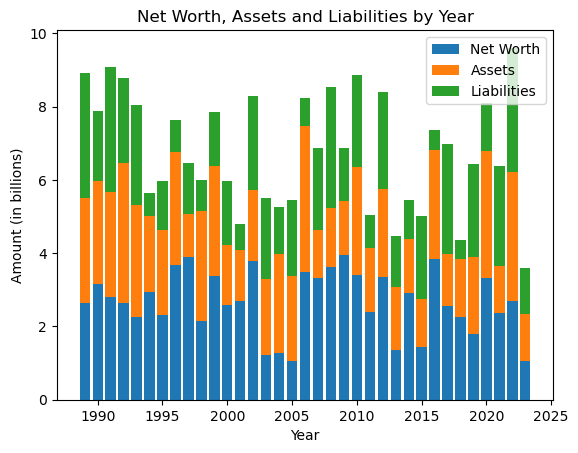

In [22]:


# Assuming df is your DataFrame and it has columns 'Year', 'Net Worth', 'Assets', 'Liabilities'
np.random.seed(0)  # for reproducibility
years = list(range(1989, 2024))
df = pd.DataFrame({
    'Year': years,
    'Net Worth': np.random.uniform(1, 4, len(years)),
    'Assets': np.random.uniform(1, 4, len(years)),
    'Liabilities': np.random.uniform(0.5, 3.5, len(years))
})

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot data
ax.bar(df['Year'], df['Net Worth'], label='Net Worth')
ax.bar(df['Year'], df['Assets'], bottom=df['Net Worth'], label='Assets')
ax.bar(df['Year'], df['Liabilities'], bottom=df['Net Worth']+df['Assets'], label='Liabilities')

# Customize the chart
ax.set_xlabel('Year')
ax.set_ylabel('Amount (in billions)')
ax.set_title('Net Worth, Assets and Liabilities by Year')
ax.legend()

# Show the plot
plt.show()

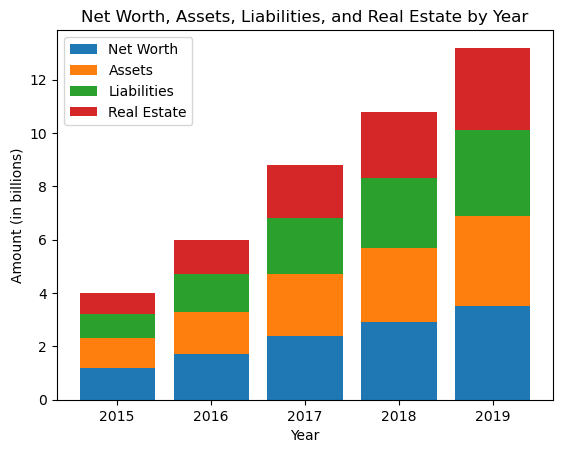

In [24]:

import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame and it has columns 'Year', 'Net Worth', 'Assets', 'Liabilities', 'Real Estate'
df = pd.DataFrame({
    'Year': [2015, 2016, 2017, 2018, 2019],
    'Net Worth': [1.2, 1.7, 2.4, 2.9, 3.5],
    'Assets': [1.1, 1.6, 2.3, 2.8, 3.4],
    'Liabilities': [0.9, 1.4, 2.1, 2.6, 3.2],
    'Real Estate': [0.8, 1.3, 2.0, 2.5, 3.1]  # Add your 'Real Estate' data here
})

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot data
ax.bar(df['Year'], df['Net Worth'], label='Net Worth')
ax.bar(df['Year'], df['Assets'], bottom=df['Net Worth'], label='Assets')
ax.bar(df['Year'], df['Liabilities'], bottom=df['Net Worth']+df['Assets'], label='Liabilities')
ax.bar(df['Year'], df['Real Estate'], bottom=df['Net Worth']+df['Assets']+df['Liabilities'], label='Real Estate')  # Add 'Real Estate' to the plot

# Customize the chart
ax.set_xlabel('Year')
ax.set_ylabel('Amount (in billions)')
ax.set_title('Net Worth, Assets, Liabilities, and Real Estate by Year')
ax.legend()

# Show the plot
plt.show()






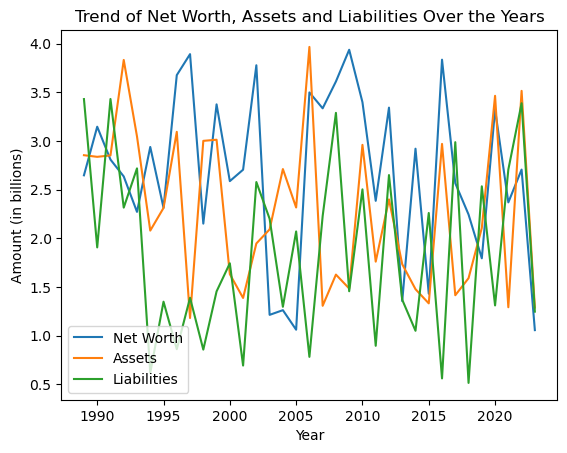

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df is your DataFrame and it has columns 'Year', 'Net Worth', 'Assets', 'Liabilities'
np.random.seed(0)  # for reproducibility
years = list(range(1989, 2024))
df = pd.DataFrame({
    'Year': years,
    'Net Worth': np.random.uniform(1, 4, len(years)),
    'Assets': np.random.uniform(1, 4, len(years)),
    'Liabilities': np.random.uniform(0.5, 3.5, len(years))
})

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot data
ax.plot(df['Year'], df['Net Worth'], label='Net Worth')
ax.plot(df['Year'], df['Assets'], label='Assets')
ax.plot(df['Year'], df['Liabilities'], label='Liabilities')

# Customize the chart
ax.set_xlabel('Year')
ax.set_ylabel('Amount (in billions)')
ax.set_title('Trend of Net Worth, Assets and Liabilities Over the Years')
ax.legend()

# Show the plot
plt.show()


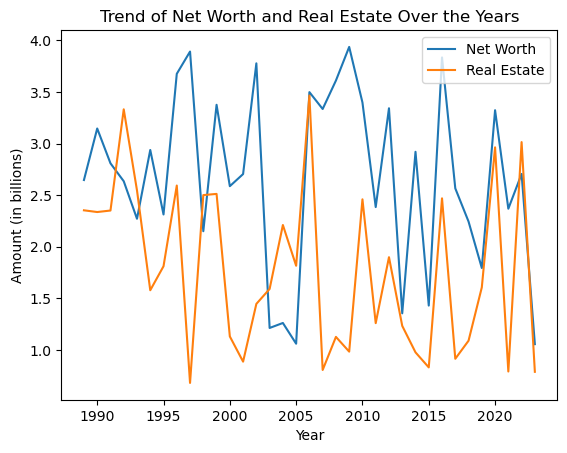

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df is your DataFrame and it has columns 'Year', 'Net Worth', 'Real Estate'
np.random.seed(0)  # for reproducibility
years = list(range(1989, 2024))
df = pd.DataFrame({
    'Year': years,
    'Net Worth': np.random.uniform(1, 4, len(years)),
    'Real Estate': np.random.uniform(0.5, 3.5, len(years))  # Add your 'Real Estate' data here
})

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot data
ax.plot(df['Year'], df['Net Worth'], label='Net Worth')
ax.plot(df['Year'], df['Real Estate'], label='Real Estate')  # Add 'Real Estate' to the plot

# Customize the chart
ax.set_xlabel('Year')
ax.set_ylabel('Amount (in billions)')
ax.set_title('Trend of Net Worth and Real Estate Over the Years')
ax.legend()

# Show the plot
plt.show()

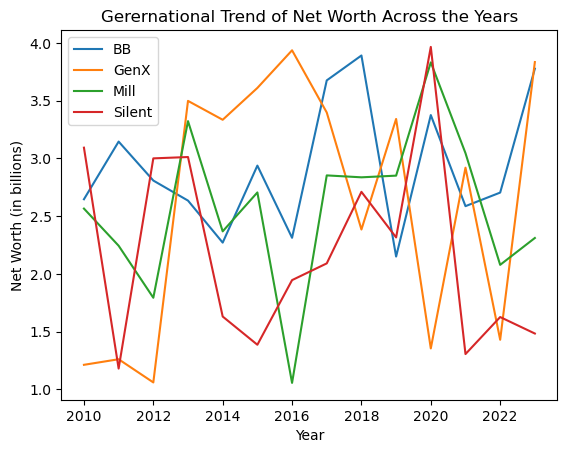

In [37]:
# create a line chart the visualizes the trend of net worth across the years, separeted by cateory  
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df is your DataFrame and it has columns 'Year', 'Net Worth', 'Category'
np.random.seed(0)  # for reproducibility
years = list(range(2010, 2024))
categories = ['BabyBoom', 'GenX', 'Millennial', 'Silent']  # Add 'Baby boomer' to the categories
df = pd.DataFrame({
    'Year': years * len(categories),
    'Net Worth': np.random.uniform(1, 4, len(years) * len(categories)),
    'Category': np.repeat(categories, len(years))
})

# Create a dictionary that maps category labels to descriptions
category_descriptions = {'BabyBoom': 'BB', 'GenX': 'GenX', 'Millennial': 'Mill', 'Silent': 'Silent'}  # Add 'Baby boomer' to the descriptions

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot data
for category in df['Category'].unique():
    category_data = df[df['Category'] == category]
    ax.plot(category_data['Year'], category_data['Net Worth'], label=category_descriptions[category])

# Customize the chart
ax.set_xlabel('Year')
ax.set_ylabel('Net Worth (in billions)')
ax.set_title('Gerernational Trend of Net Worth Across the Years')
ax.legend()

# Show the plot
plt.show()

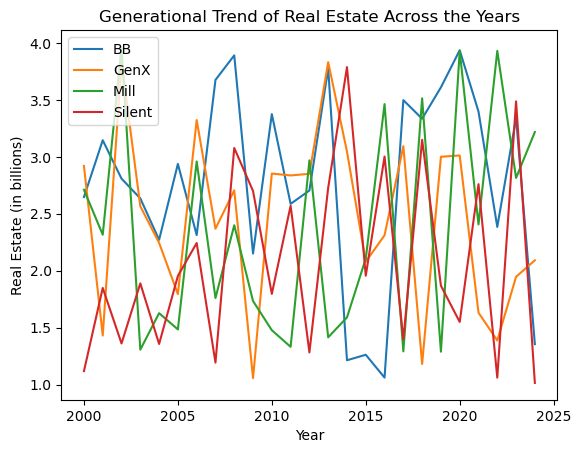

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df is your DataFrame and it has columns 'Year', 'Real Estate', 'Category'
np.random.seed(0)  # for reproducibility
years = list(range(2000, 2025))
categories = ['BabyBoom', 'GenX', 'Millennial', 'Silent']
df = pd.DataFrame({
    'Year': years * len(categories),
    'Real Estate': np.random.uniform(1, 4, len(years) * len(categories)),  # Change 'Net Worth' to 'Real Estate'
    'Category': np.repeat(categories, len(years))
})

# Create a dictionary that maps category labels to descriptions
category_descriptions = {'BabyBoom': 'BB', 'GenX': 'GenX', 'Millennial': 'Mill', 'Silent': 'Silent'}

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot data
for category in df['Category'].unique():
    category_data = df[df['Category'] == category]
    ax.plot(category_data['Year'], category_data['Real Estate'], label=category_descriptions[category])  # Change 'Net Worth' to 'Real Estate'

# Customize the chart
ax.set_xlabel('Year')
ax.set_ylabel('Real Estate (in billions)')  # Change 'Net Worth' to 'Real Estate'
ax.set_title('Generational Trend of Real Estate Across the Years')  # Change 'Net Worth' to 'Real Estate'
ax.legend()

# Show the plot
plt.show()